<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-анализ-исходных-данных" data-toc-modified-id="Загрузка-и-анализ-исходных-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и анализ исходных данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

In [1]:
#%load_ext lab_black

# Защита персональных данных клиентов

**Описание проекта**

**Цель** - защитить данные клиентов страховой компании «Хоть потоп». 

**Задача** - разработать метод преобразования данных, по которому сложно восстановить персональную информацию. При преобразовании данных качество моделей машинного обучения ухудшится не должно.

## Загрузка и анализ исходных данных

### Загрузка данных

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline


In [3]:
# создадим DataFrame
try:
    df = pd.read_csv("insurance.csv")
except:
    df = pd.read_csv("/datasets/insurance.csv")

Посмотрим на данные в таблице

In [4]:
df.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Посмотрим на количество строк и столбцов

In [5]:
df.shape

(5000, 5)

Посмотрим на типы переменных и есть ли пропущенные значения

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропущенных значений нет, данные состоят из **пяти** столбцов и **пяти тысяч строк**. Столбцы "Пол", "Члены семьи", "Страховые выплаты" - содержат целочисленные переменные, "Возраст" и "Зарплата" - вещественные переменные.

Мне не нравится названия столбцов: во вторых избавимся от верхнего регистра в названиях самих столбцов, запишем их на английском языке что-бы постоянно не переключать язык.

In [7]:
df.columns = ['gender', 'age', 'salary', 'family_member', 'insurance_payments']

Проверим что все ОК.

In [8]:
df.columns

Index(['gender', 'age', 'salary', 'family_member', 'insurance_payments'], dtype='object')

#### Вывод

Данные состоят из **пяти** столбцов и **пяти тысяч строк**. Столбцы "Пол", "Члены семьи", "Страховые выплаты" - содержат целочисленные переменные, "Возраст" и "Зарплата" - вещественные переменные.

### Исследовательский анализ данных

Проверим на отсутствие дубликатов

In [9]:
df.duplicated().sum()

153

Данные содержат 153 дубликата

Удалим дубликаты, они оказывают плохое влияние на качество машинного обучения.

In [10]:
df = df.drop_duplicates().reset_index(drop=True)

Проверим что все ОК.

In [11]:
df.duplicated().sum()

0

Проверим данные на наличие пропущенных значений. Хотя в методе info() уже видно что пропущенных значений нет.

In [12]:
df.isna().mean()

gender                0.0
age                   0.0
salary                0.0
family_member         0.0
insurance_payments    0.0
dtype: float64

Пропущенных значений нет.

Посмотрим как зависят страховые выплаты от пола клиента.

In [13]:
df.groupby('gender', dropna=False)['insurance_payments'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
gender,,
1,2416,0.157699
0,2431,0.146853


Если учесть что 1 отображаются мужчины, а 0 женщины то больше страховых выплат получает мужчины. Но разница не большая.

Посмотрим как зависят страховые выплаты от возраста клиента.

In [14]:
df['age'].agg(['min', 'max'])

min    18.0
max    65.0
Name: age, dtype: float64

Посмотрим на разбивку клиентов по возрастам

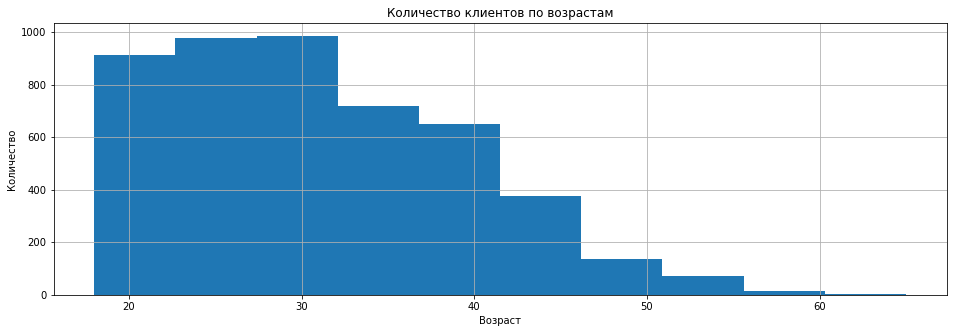

In [15]:
plt.figure(figsize=(16,5))
plt.title('Количество клиентов по возрастам')
plt.ylabel("Количество")
plt.xlabel("Возраст")
df['age'].hist();

Минимальный возраст клиента 18 максимальный 65.

Для лучшего анализа, я разобью сет на бины, предварительно создав его копию и работая с ней, что-бы не портить основные данные.

In [16]:
df_w = df.copy()

In [17]:
df_w['age_bin'] = pd.qcut(df_w['age'], 5)

In [18]:
df_w.groupby('age_bin', 
           dropna=False)['insurance_payments'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
age_bin,,
"(39.0, 65.0]",834,0.884892
"(17.999, 23.0]",1108,0.000000
"(23.0, 28.0]",979,0.000000
"(28.0, 33.0]",976,0.000000
"(33.0, 39.0]",950,0.000000


Посмотрим на графическую зависимость.

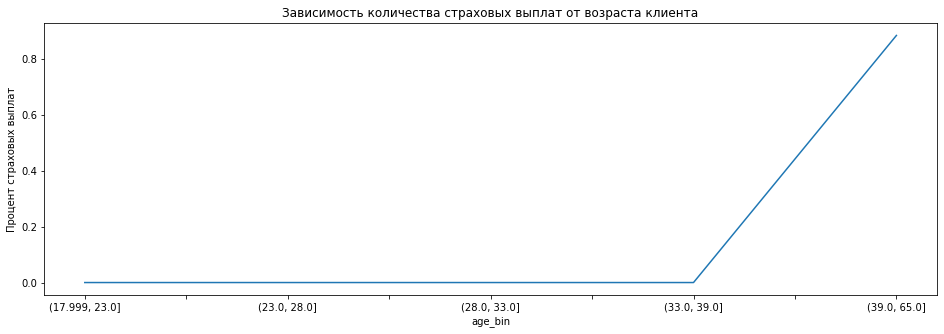

In [19]:
plt.figure(figsize=(16,5))
plt.title("Зависимость количества страховых выплат от возраста клиента")
plt.ylabel("Процент страховых выплат")
df_w.groupby('age_bin', dropna=False)['insurance_payments'].mean().plot();

Как-то странно получается страховые выплаты выплачиваются только с 40 и до 65 лет, остальным они не нужны?

Посмотрим как зависят страховые выплаты от зарплаты клиентов.

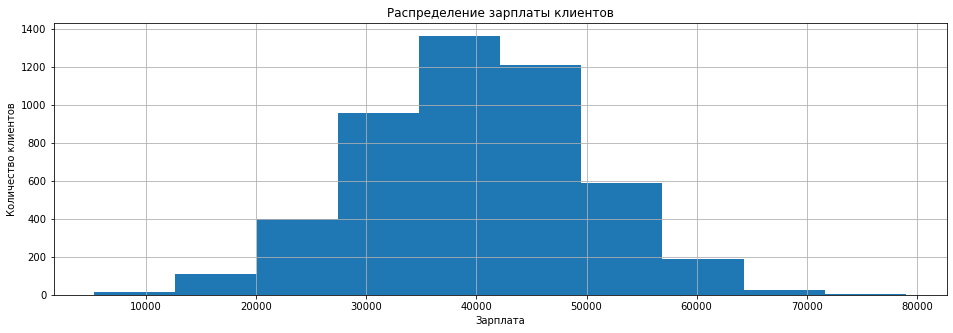

In [20]:
plt.figure(figsize=(16,5))
plt.title('Распределение зарплаты клиентов')
plt.ylabel("Количество клиентов")
plt.xlabel("Зарплата")
df['salary'].hist();

Для лучшего анализа, так-же разобью сет на бины, работаю с копией.

In [21]:
df_w['salary'] = pd.qcut(df_w['salary'], 8, duplicates='drop')

In [22]:
df_w.groupby('salary')['insurance_payments'].agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
salary,,
"(5299.999, 28300.0]",610,0.177049
"(28300.0, 33200.0]",611,0.168576
"(40200.0, 43200.0]",608,0.164474
"(51300.0, 79000.0]",599,0.150250
"(36700.0, 40200.0]",615,0.149593
"(43200.0, 46600.0]",588,0.142857
"(46600.0, 51300.0]",610,0.139344
"(33200.0, 36700.0]",606,0.125413


Посмотрим на графическую зависимость.

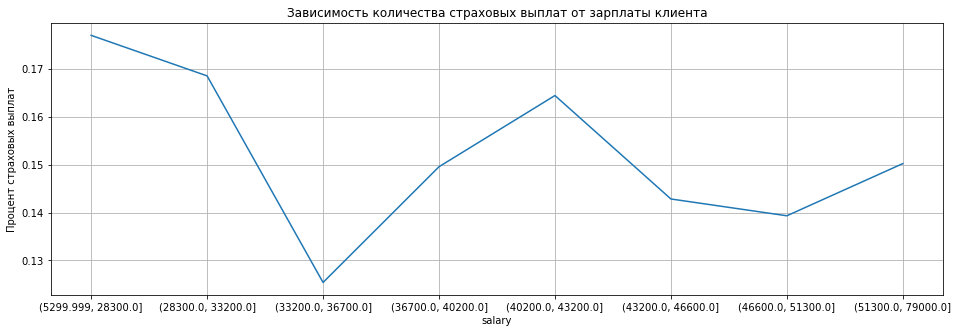

In [23]:
plt.figure(figsize=(16,5))
plt.title("Зависимость количества страховых выплат от зарплаты клиента")
plt.ylabel("Процент страховых выплат")
df_w.groupby('salary', dropna=False)['insurance_payments'].mean().plot();
plt.grid()

Тут очень трудно проследить зависимость! Если аппроксимировать то больше похоже на функцию с гармоническими колебаниями.

Посмотрим как зависят стразовые выплаты от количества членов семьи.

In [24]:
df.groupby('family_member', dropna=False)['insurance_payments'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

,count,mean
family_member,,
0,1461,0.165640
1,1748,0.164760
6,7,0.142857
2,1038,0.138728
5,32,0.125000
3,437,0.109840
4,124,0.088710


Из данных видно, что больше всех страховые выплаты получают семьи где нет детей или один ребенок, меньше всех семьи имеющие троих и четверых детей соответственно.

И посмотрим на распределение нашего целевого признака.

In [25]:
df['insurance_payments'].value_counts()

0    4284
1     423
2     114
3      18
4       7
5       1
Name: insurance_payments, dtype: int64

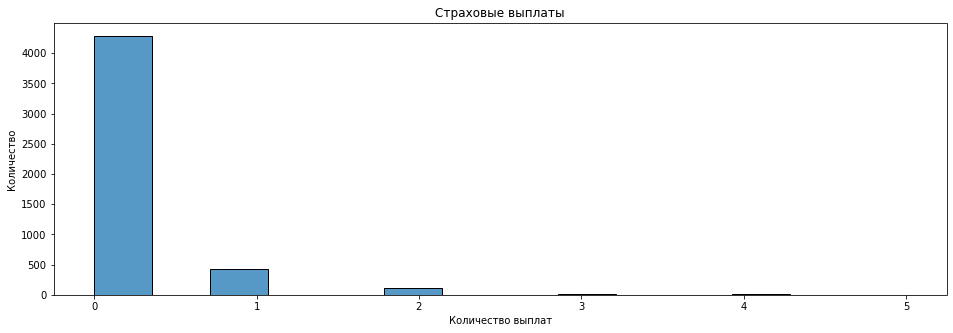

In [26]:
plt.figure(figsize=(16,5))
plt.title("Страховые выплаты")
plt.ylabel("Количество")
plt.xlabel("Количество выплат")
sns.histplot(df['insurance_payments']);

Чем больше страховых выплат тем меньше их количество.

Посмотрим на общую картину распределения величин в DataFrime

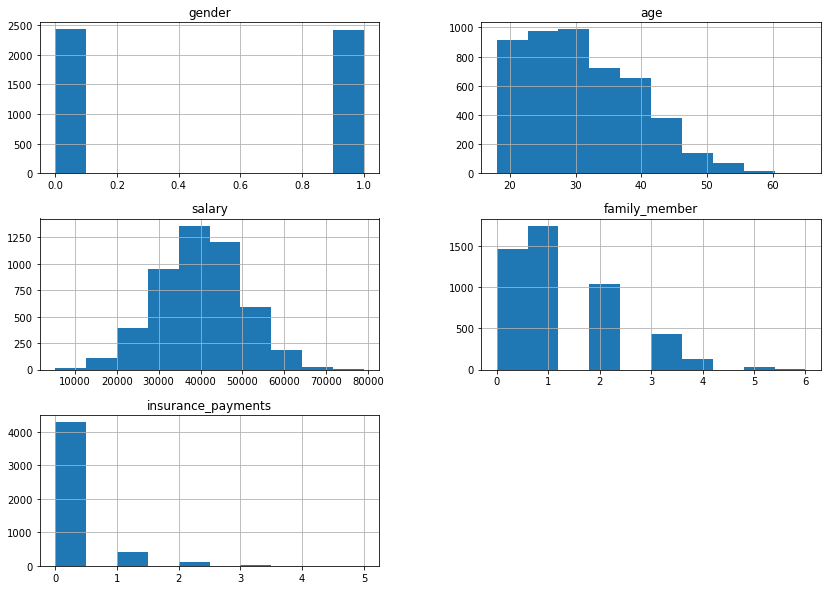

In [27]:
df.hist(column=df.columns, figsize=(14, 10));

Посмотрим как коррелируют между собой данные.

In [28]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_30918/3129850035.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,gender,age,salary,family_member,insurance_payments
gender,1.00,0.00,0.02,-0.01,0.01
age,0.00,1.00,-0.02,-0.01,0.65
salary,0.02,-0.02,1.00,-0.03,-0.01
family_member,-0.01,-0.01,-0.03,1.00,-0.04
insurance_payments,0.01,0.65,-0.01,-0.04,1.00


Мы наблюдаем умеренную положительную корреляционную зависимость между возрастом клиента и количеством выплат.

### Вывод

1. Данные состоят из **пяти** столбцов и **пяти тысяч строк**. Столбцы "Пол", "Члены семьи", "Страховые выплаты" - содержат целочисленные переменные, "Возраст" и "Зарплата" - вещественные переменные.
2. Больше страховых выплат получает мужчины.
3. Страховые выплаты выплачиваются клиентам возрастом с 40 и до 65 лет.
4. Страховые выплаты не зависят от зарплаты клиента.
5. Больше всех страховые выплаты получают семьи где нет детей или один ребенок, меньше всех семьи имеющие троих и четверых детей соответственно.
6. Чем больше страховых выплат тем меньше их количество.
7. Наблюдается умеренная положительная корреляционная зависимость между возрастом клиента и количеством выплат.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос**: Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Обоснование:**

Разделим переменные на независимые и целевые. 

**Целевая переменная** (таргет) - столбец insurance_payments.

**Признаки** (фичи) - все столбцы кроме столбца insurance_payments (это таргет).

In [29]:
target = df.loc[:, 'insurance_payments']
features = df.drop(['insurance_payments'], axis=1)

Разделим выборку на тестовую и обучающею.

In [30]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

Посчитаем линейную регрессию и метрику R2

In [31]:
regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
pipeline.fit(features_train, target_train)
R2_LR_cipher_data_scaled = r2_score(target_test, pipeline.predict(features_test))
print("R2 =", R2_LR_cipher_data_scaled)

R2 = 0.4230772749214825


Умножим признаки на обратимую матрицу и проверим качество линейной регрессии

Преобразуем выборки в матрицы

In [32]:
matrix_features_train = features_train.values
matrix_features_test = features_test.values

Проверим что все ОК

In [33]:
print(matrix_features_train.shape)
print(matrix_features_test.shape)

(3635, 4)
(1212, 4)


Сделаем случайную обратимую матрицу 4 на 4 по количеству признаков основной матрицы:

In [34]:
random_matrix = np.random.randn(4, 4)
random_matrix

array([[-0.8919858 , -1.07481461,  0.56694234, -0.32285187],
       [ 1.05990559,  0.85197356, -2.43410248,  1.20393697],
       [-1.86494867,  0.35736309,  1.3764502 ,  2.31163187],
       [-0.04560024,  0.01277109, -0.02967858,  1.16992721]])

Проверим явлется ли наша матрица на обратимой. Для этого умножим её на обратную ей матрицу. В результате должна получиться единичная матрица.

In [35]:
np.round(random_matrix @ np.linalg.inv(random_matrix))

array([[ 1.,  0., -0.,  0.],
       [ 0.,  1.,  0., -0.],
       [ 0., -0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

Все ок

Перемножим тестовую и тренировочную матрицы на получившуюся рандомную обратимую матрицу:

In [36]:
encoded_matrix_features_train = matrix_features_train.dot(random_matrix)
encoded_matrix_features_test = matrix_features_test.dot(random_matrix)

Посчитаем линейную регрессию и метрику R2

In [37]:
model = LinearRegression()
model.fit(encoded_matrix_features_train, target_train)
R2_LR_origin_data = r2_score(target_test, model.predict(encoded_matrix_features_test))
print("R2_encoded_matrix =", R2_LR_origin_data)

R2_encoded_matrix = 0.4230772749217886


**Ответ:** $ R^2 $ не поменяется

**Математическое обоснование:**

Представим новую матрицу признаков X1 как произведение старой X на матрицу P(обратимую):
$$X1 = X∗P$$

Подставим новое значение X1 в формулу w1:
$$w1=((XP)^TXP)^{−1}(XP)^Ty$$

Раскроем первое произведение:
    $$w1=(P^TX^TXP)^{-1}P^TX^Ty$$

Перегруппируем множители в скобках:
$$w1=(P^T(X^TX)P)^{-1}P^TX^Ty$$

Раскроем скобки:
$$w1=P^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^Ty$$

Так как $P$ по условию обратимая, то произведение  $(P^T)^{−1}P^T$ равно $E$(единичная матрица):

$$w1=P^{-1}(X^TX)^{-1}EX^Ty=P^{-1}(X^TX)^{-1}X^Ty$$

Можно заметить, что справа получилась формула для $w$:
$$w1=P^{-1}(X^TX)^{-1}X^Ty=P^{-1}w$$

Подставим новое значение весов $𝑤1$ в формулу для предсказаний линейной регрессии. Предсказания модели расчитываются по формуле:
$$a=Xw$$

Подставим в эту формулу значения $X1$ и $w1$ для того, чтобы на их основе вычислить предсказания модели $a1$:
$$a1=X1w1=XPP^{-1}w$$

Так как $P$ по условию обратимая, то произведение $PP^{−1}$ снова равно $E$:
$$a1=XPP^{-1}w=XEw=Xw=a$$

Следовательно, отвечая на вопрос изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу - нет, не изменится. В данном случае, параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w1$ связаны следующим образом:
$$w1=P^{-1}w$$

## Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу , которая будет генерироваться случайным образом.

**"Этапы алгоритма**
1. Составление матрицы.
2. Проверка матрицы на обратимость.
3. Получение матрицы признаков.

Создадим функцию преобразования матрицы признаков.

In [38]:
def code_features(features):
    n = features.shape[1]
    cipher_matrix = np.random.randn(n, n)
    crypted_features = features @ cipher_matrix
    return crypted_features, cipher_matrix

Выведем данные до преобразования и после.

In [39]:
display(features.head())
features_ciphere, cipher_matrix = code_features(features)
display(features_ciphere.head())
cipher_matrix

,gender,age,salary,family_member
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


,0,1,2,3
0,-125862.904311,5368.673775,-34479.272617,-36899.361101
1,-96437.169150,4136.599018,-26419.357246,-28257.437515
2,-53296.344584,2291.835147,-14601.349976,-15612.803124
3,-105807.135770,4492.518870,-28983.394154,-31034.928900
4,-66234.655177,2835.038999,-18145.340627,-19410.680952


array([[-0.53004592, -0.67432917, -0.14312871,  0.93792266],
       [-0.69843623,  1.58032831, -0.27286507,  0.88712154],
       [-2.53695666,  0.10695265, -0.69492557, -0.74469189],
       [-0.68787125, -0.29674113,  0.36605999,  0.04663922]])

Как видно, данные закодированы, теперь в них хранится непонятное число. Разобьем данные таргеты и фичи.

In [40]:
features_train, features_test, target_train, target_test = train_test_split(
    features_ciphere, target, test_size=0.25, random_state=12345)

In [41]:
regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
pipeline.fit(features_train, target_train)
R2_LR_cipher_data_scaled = r2_score(target_test, pipeline.predict(features_test))
print("R2 =", R2_LR_cipher_data_scaled)

R2 = 0.42307727492148595


По показателю коэффициента детерминации качество модели не поменялось.

____

Ниже создана функция которая закодирует датасет.

In [42]:
def code_df(df, target):
    # выделим отдельно фичи
    features_code = df.drop([target], axis=1).columns
    # посмотрим на размер
    df_features = df[features_code]
    n = df_features.shape[1]
    # создадим матрицу кодирования
    cipher_matrix = np.random.randn(n, n)
    # умножим фичи на матрицу кодирования
    crypted_df = df_features @ cipher_matrix
    # добавим столбец с таргетом
    crypted_df['target'] = df[target]  
    # изменим названия столбцов
    crypted_df.columns = df.columns
    # возвратим df и матрицу кодированя
    return crypted_df, cipher_matrix

Проверим что все впорядке.

In [43]:
df_new, cipher_matrix = code_df(df, 'insurance_payments')
display(df_new.head(3))
display(cipher_matrix)

,gender,age,salary,family_member,insurance_payments
0,28291.036788,80943.360730,-12370.961374,73866.684881,0
1,21681.567240,62011.146036,-9499.850173,56606.427259,1
2,11984.261483,34268.564917,-5257.407114,31285.826036,0


array([[-1.53570134,  0.10447617, -0.52548571, -0.17070132],
       [ 0.42211817, -0.1335785 , -1.59407001,  1.01175175],
       [ 0.57009619,  1.63202089, -0.24815138,  1.48840406],
       [-1.50553619,  0.49682073,  3.22967473,  0.5324425 ]])

Как видно, данные закодированы, теперь в них хранится непонятное число. Разобьем данные таргеты и фичи и далее по алгоритму

In [44]:
target = df_new.loc[:, 'insurance_payments']
features = df_new.drop(['insurance_payments'], axis=1)

In [45]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [46]:
regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
pipeline.fit(features_train, target_train)
R2_df_new = r2_score(target_test, pipeline.predict(features_test))
print("R2 =", R2_df_new)

R2 = 0.42307727492151226


По показателю коэффициента детерминации качество модели не поменялось.

### Вывод 

Для защиты информации необходимо признаки умножать на обратимую матрицу, которая будет генерироваться случайным образом. При этом по показателю коэффициента детерминации качество модели не поменялось. В ходе выполнения проекта я заметил интересный момент,  если мы исходный датафрейм умножаем на обратимую матрицу то у нашей линейной регрессии коэффициент детерминации становится равен 0.999, а если посмотреть на корреляцию между признаками то она почти везде равна  1. Так что получается для кодирования данных подходит только алгоритм в котором мы умножаем только фичи, а таргеты не трогаем.

## Общий вывод

1. Данные состоят из **пяти** столбцов и **пяти тысяч строк**. Столбцы "Пол", "Члены семьи", "Страховые выплаты" - содержат целочисленные переменные, "Возраст" и "Зарплата" - вещественные переменные.
2. Больше страховых выплат получают мужчины.
3. Страховые выплаты выплачиваются клиентам возрастом с 40 и до 65 лет.
4. Страховые выплаты не зависят от зарплаты клиента.
5. Больше всех страховые выплаты получают семьи где нет детей или один ребенок, меньше всех семьи имеющие троих и четверых детей соответственно.
6. Чем больше страховых выплат тем меньше их количество.
7. Наблюдается умеренная положительная корреляционная зависимость между возрастом клиента и количеством выплат.
8. Качество линейной регрессии при умножении признаков на обратимую матрицу не изменятся. 
9. Была создана функция для защиты информации которая на вход получает исходные данные, признаки  в исходных данных умножает на обратимую матрицу, которая генерируется случайным образом. При этом по показателю коэффициента детерминации качество модели не поменялось.